# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

## Loading Required Libraries:

In [2]:
conda list

# packages in environment at C:\Users\unive\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_py-xgboost-mutex         2.0                       cpu_0    anaconda
alabaster                 0.7.12                   py37_0  
anaconda                  2019.07                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0  
asn1crypto                0.24.0                   py37_0  
astroid                   2.2.5                    py37_0  
astropy                   3.2.1            py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.1.0                   py37_1  
babel                     2.7.0                      py_0  
backcall                  0.1.0                    py37_0  
backports                 

In [2]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.


In [1]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

C:\Users\unive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data:

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

## Data Exploration & Checking Missing Values:

In [3]:
print(data.shape)

(205, 26)


In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Enumeration:

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])
data['enginetype'] = labelencoder.fit_transform(data['enginetype'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])

In [9]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})
data['enginelocation'] = data['enginelocation'].map({'front':1,'rear':2})

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,1,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,1,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,1,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,1,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,1,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

## Correlation:

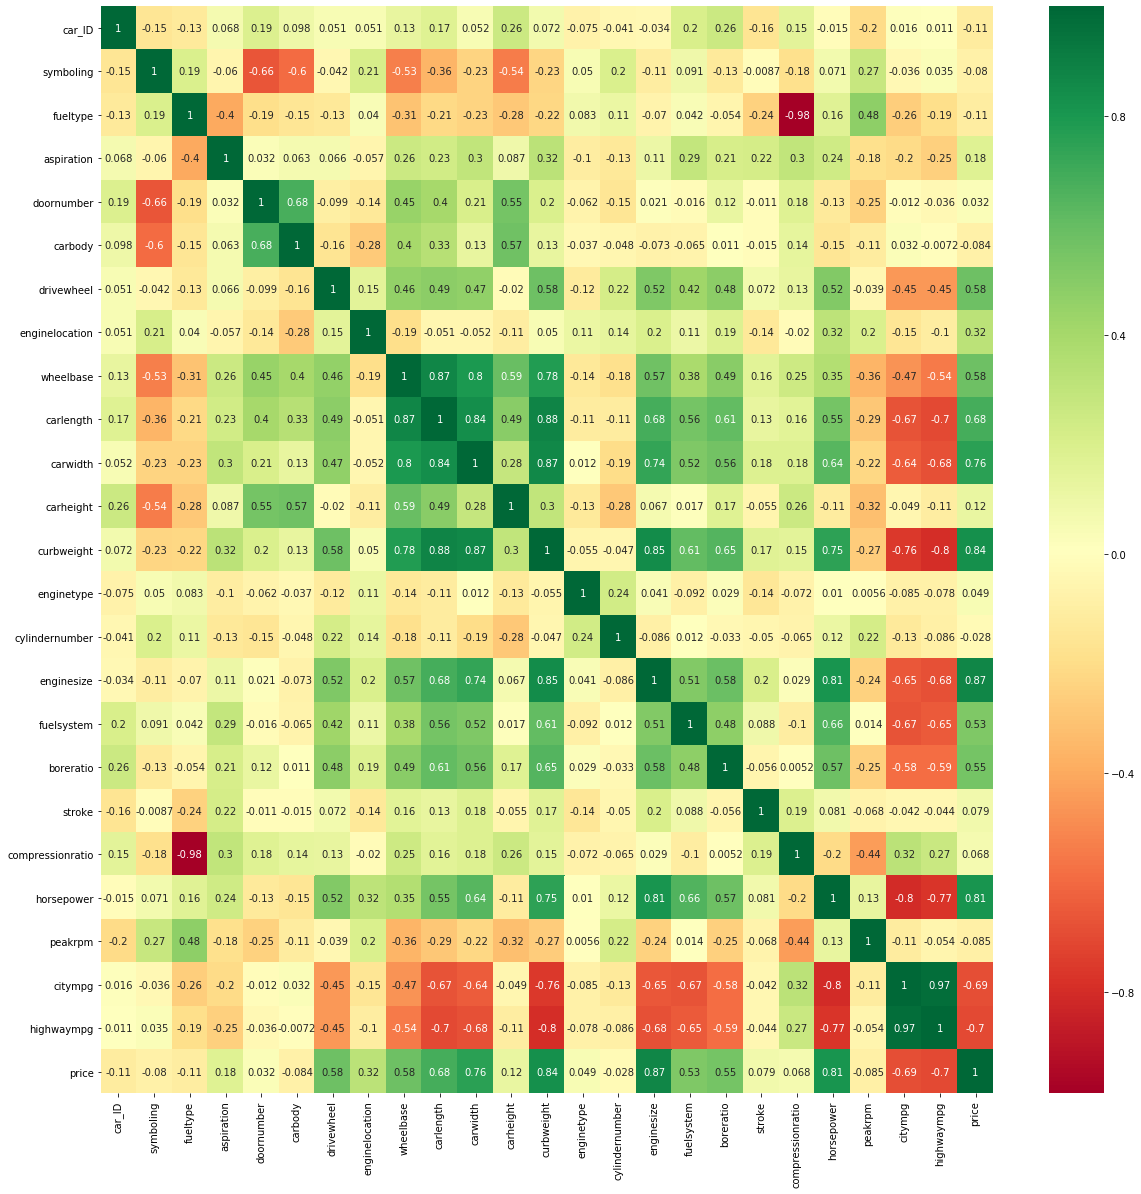

In [12]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
data.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
cylindernumber     -0.027628
doornumber          0.031835
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [14]:
data1 = data[['highwaympg','citympg','fuelsystem','boreratio','wheelbase','drivewheel',
              'carlength','carwidth','horsepower','curbweight','enginesize','price']]

In [15]:
print(data1.shape)
data1.head()

(205, 12)


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [16]:
# data1['enginelocation'].value_counts()

In [17]:
data_f = data1.sample(frac=1)
data_f

,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
91,37,31,1,3.15,94.5,1,165.3,63.8,69,1918,97,6649.0
73,16,14,5,3.80,120.9,2,208.1,71.7,184,3900,308,40960.0
103,25,19,5,3.43,100.4,1,184.6,66.5,152,3060,181,13499.0
41,28,24,5,3.15,96.5,1,175.4,65.2,101,2465,110,12945.0
80,30,23,6,3.17,96.3,1,173.0,65.4,116,2370,110,9959.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,29,26,5,3.24,94.5,2,168.7,64.0,112,2265,98,9298.0
195,28,23,5,3.78,104.3,2,188.8,67.2,114,3034,141,13415.0
151,38,31,1,3.05,95.7,1,158.7,63.6,62,2040,92,6338.0
160,47,38,1,3.19,95.7,1,166.3,64.4,70,2094,98,7738.0


In [18]:
# data_s = data_f.sort_values('enginelocation', ascending = False)
# data_s

## Data Split:

In [19]:
x = (data_f.loc[:, data_f.columns != 'price'])
y = (data_f.loc[:, data_f.columns == 'price'])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.40, random_state=42)

In [21]:
# x_train = x[2:106]
# y_train = y[2:106]
# x_test = pd.concat([x.iloc[1:2],x.iloc[106:166]])
# y_test= pd.concat([x.iloc[1:2],x.iloc[106:166]])
# x_val = pd.concat([x.iloc[0:1],x.iloc[166:]])
# y_val = pd.concat([x.iloc[0:1],x.iloc[166:]])

# print(x_train.shape)
# print(x_test.shape)
# print(x_val.shape)

## Modeling (1):

In [22]:
# def build_model():
#     model = Sequential()
#     model.add(tf.keras.layers.Dense(64, activation='relu'),input_shape =(11,))

#     model.add(tf.keras.layers.Dense(1,))
    
#     return model

In [23]:
# build_model

## Modeling (2):

In [24]:
mean=x_train.mean(axis=0)
x_train -= mean
std=x_train.std(axis=0)
x_train /= std

print(mean)
print(std)

x_train

highwaympg      30.696078
citympg         25.137255
fuelsystem       3.176471
boreratio        3.314020
wheelbase       99.155882
drivewheel       1.343137
carlength      174.643137
carwidth        66.000980
horsepower     105.774510
curbweight    2596.617647
enginesize     132.107843
dtype: float64
highwaympg      7.279143
citympg         6.711951
fuelsystem      2.065328
boreratio       0.278707
wheelbase       6.627838
drivewheel      0.516943
carlength      13.785633
carwidth        2.213080
horsepower     41.393525
curbweight    579.934924
enginesize     49.498656
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
112,0.316510,0.426515,-0.085444,1.384895,1.319302,1.270669,0.874596,1.084019,-0.260295,1.130096,0.401873
68,-0.782520,-0.467413,-0.085444,0.954336,1.636147,1.270669,1.179261,1.942551,0.416140,1.988813,1.028152
180,-0.919899,-0.765389,0.882925,-0.157942,0.806314,1.270669,0.954389,0.225487,1.213366,0.921452,0.785721
80,-0.095626,-0.318425,1.367109,-0.516741,-0.430892,-0.663782,-0.119192,-0.271558,0.247031,-0.390764,-0.446635
171,-0.095626,-0.169437,0.882925,1.097856,-0.114047,1.270669,0.112934,-0.181187,0.247031,0.202406,0.280657
...,...,...,...,...,...,...,...,...,...,...,...
128,-0.782520,-1.212353,0.882925,1.528415,-1.456868,1.270669,-0.416603,-0.452302,2.445443,0.350699,1.250381
9,-1.194657,-1.361341,0.882925,-0.660261,0.051920,-2.598233,0.258012,0.858089,1.309999,0.786954,-0.022381
193,0.041752,-0.020449,0.882925,-0.444982,0.187711,-0.663782,0.613455,0.406230,-0.429403,-0.057968,-0.466838
118,1.415540,1.767406,-1.053814,-1.234340,-0.823177,-0.663782,-1.258059,-0.994533,-0.912571,-1.170162,-0.850687


In [25]:
mean=x_test.mean(axis=0)
x_test -= mean
std=x_test.std(axis=0)
x_test /= std

print(mean)
print(std)

x_test

highwaympg      31.688525
citympg         26.196721
fuelsystem       3.360656
boreratio        3.320984
wheelbase       99.067213
drivewheel       1.311475
carlength      174.577049
carwidth        65.890164
horsepower      96.737705
curbweight    2519.786885
enginesize     120.868852
dtype: float64
highwaympg      6.998907
citympg         6.695321
fuelsystem      1.932466
boreratio       0.272040
wheelbase       6.002964
drivewheel      0.563944
carlength      12.000103
carwidth        2.189270
horsepower     29.797037
curbweight    476.924177
enginesize     27.926377
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
122,0.901780,0.717408,-1.221577,-1.290192,-0.894094,-0.552316,-0.606416,-0.954731,-0.964448,-0.689390,-0.818898
182,2.044816,1.613557,-0.186630,-1.143155,-0.294390,-0.552316,-0.239752,-0.178216,-1.501415,-0.542616,-0.854706
149,-1.241412,-0.477456,0.848317,1.099164,-0.361024,-2.325542,-0.081420,-0.223894,0.478648,0.273027,-0.460814
142,0.187383,0.269334,-1.221577,1.099164,-0.311049,-0.552316,-0.214752,-0.223894,-0.494603,-0.691487,-0.460814
90,2.616334,2.808421,-0.186630,-1.216673,-0.760826,-0.552316,-0.773081,-0.954731,-1.400733,-1.054228,-0.639856
...,...,...,...,...,...,...,...,...,...,...,...
172,-0.241255,-0.328098,0.848317,1.099164,-0.111147,1.220910,0.135245,-0.132539,0.646450,0.954477,0.899907
19,1.616177,1.762915,-1.221577,-1.069636,-0.760826,-0.552316,-1.556407,-1.046086,-0.897328,-1.354066,-1.105365
5,-0.955653,-1.074888,0.848317,-0.481487,0.122071,-0.552316,0.226911,0.187202,0.445088,-0.026811,0.541823
14,-0.955653,-0.925530,0.848317,-0.040375,0.738433,1.220910,1.201902,0.461266,0.814252,1.122218,1.544459


In [26]:
mean=x_val.mean(axis=0)
x_val -= mean
std=x_val.std(axis=0)
x_val /= std

print(mean)
print(std)

x_val

highwaympg      29.523810
citympg         24.000000
fuelsystem       3.285714
boreratio        3.380714
wheelbase       97.335714
drivewheel       1.309524
carlength      171.840476
carwidth        65.707143
horsepower     110.809524
curbweight    2507.833333
enginesize     123.047619
dtype: float64
highwaympg      5.557847
citympg         5.780539
fuelsystem      2.039676
boreratio       0.248894
wheelbase       4.107033
drivewheel      0.643470
carlength       8.494103
carwidth        1.937737
horsepower     46.115570
curbweight    423.232446
enginesize     36.256506
dtype: float64


,highwaympg,citympg,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
158,1.165234,1.729942,-0.140078,-0.444825,-0.398272,-0.481023,-0.652273,-0.674572,-1.188525,-0.550131,-0.359870
17,-1.713579,-1.556948,0.840470,0.961396,3.083561,1.073051,2.961999,2.679856,1.543741,2.356073,2.370675
190,-0.094247,0.000000,0.840470,-0.766247,-0.690453,-0.481023,-0.722910,-0.880998,-0.451247,-0.677721,-0.387451
84,-0.993876,-0.864971,1.330743,0.840863,-0.349575,-0.481023,0.160055,0.305953,0.741409,0.988031,0.908868
4,-1.353727,-1.037965,0.840470,-0.766247,0.502622,-2.035097,0.560333,0.357560,0.090869,0.747028,0.357243
138,1.165234,1.210960,-1.120626,0.961396,-0.885241,-0.481023,-1.758923,-1.190638,-0.906625,-1.081754,-0.718426
157,1.345159,1.037965,-1.120626,-0.766247,-0.398272,-0.481023,-0.652273,-0.674572,-0.884940,-0.942351,-0.690845
85,0.445531,0.172994,-1.120626,-0.123403,-0.252181,-0.481023,0.065872,-0.158506,-0.494617,-0.337482,-0.028895
38,0.625456,0.518983,-1.610900,-0.926958,-0.203484,-0.481023,-0.510999,-0.261719,-0.537986,-0.517052,-0.359870
106,-0.813950,-0.864971,0.840470,0.198019,0.453925,1.073051,0.784017,1.131659,1.066678,1.491300,1.598399


In [27]:
model=Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))

### Compilation:

In [28]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [29]:
history=model.fit(x_train,y_train,epochs=300,validation_data=(x_val, y_val))

Epoch 1/300
4/4 [==============================] - 1s 169ms/step - loss: 268042281.6000 - mae: 13709.6049 - val_loss: 222581952.0000 - val_mae: 13098.4346
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 277145081.6000 - mae: 13875.8625 - val_loss: 222579440.0000 - val_mae: 13098.3496
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 253149414.4000 - mae: 13403.2865 - val_loss: 222576864.0000 - val_mae: 13098.2617
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 256212758.4000 - mae: 13464.7617 - val_loss: 222574688.0000 - val_mae: 13098.1855
Epoch 5/300
4/4 [==============================] - 0s 15ms/step - loss: 270831766.4000 - mae: 13740.8615 - val_loss: 222572640.0000 - val_mae: 13098.1074
Epoch 6/300
4/4 [==============================] - 0s 16ms/step - loss: 269834041.6000 - mae: 13603.5928 - val_loss: 222570576.0000 - val_mae: 13098.0225
Epoch 7/300
4/4 [==============================] - 0s 24ms/step - loss: 2983

4/4 [==============================] - 0s 15ms/step - loss: 279767686.4000 - mae: 13812.2033 - val_loss: 222364032.0000 - val_mae: 13089.5020
Epoch 54/300
4/4 [==============================] - 0s 15ms/step - loss: 279731596.8000 - mae: 13848.4654 - val_loss: 222355424.0000 - val_mae: 13089.1279
Epoch 55/300
4/4 [==============================] - 0s 14ms/step - loss: 258520902.4000 - mae: 13343.1436 - val_loss: 222346480.0000 - val_mae: 13088.7793
Epoch 56/300
4/4 [==============================] - 0s 15ms/step - loss: 254312387.2000 - mae: 13306.5842 - val_loss: 222336080.0000 - val_mae: 13088.3633
Epoch 57/300
4/4 [==============================] - 0s 15ms/step - loss: 241063142.4000 - mae: 13013.8123 - val_loss: 222326544.0000 - val_mae: 13087.9951
Epoch 58/300
4/4 [==============================] - 0s 15ms/step - loss: 269767510.4000 - mae: 13676.7369 - val_loss: 222317712.0000 - val_mae: 13087.6309
Epoch 59/300
4/4 [==============================] - 0s 13ms/step - loss: 276892422.

Epoch 106/300
4/4 [==============================] - 0s 15ms/step - loss: 281407251.2000 - mae: 13858.8746 - val_loss: 221441152.0000 - val_mae: 13051.1768
Epoch 107/300
4/4 [==============================] - 0s 14ms/step - loss: 279531430.4000 - mae: 13838.9287 - val_loss: 221412304.0000 - val_mae: 13049.9434
Epoch 108/300
4/4 [==============================] - 0s 11ms/step - loss: 296237689.6000 - mae: 14238.0521 - val_loss: 221383296.0000 - val_mae: 13048.7246
Epoch 109/300
4/4 [==============================] - 0s 13ms/step - loss: 249395481.6000 - mae: 13162.2654 - val_loss: 221349200.0000 - val_mae: 13047.3662
Epoch 110/300
4/4 [==============================] - 0s 11ms/step - loss: 279722313.6000 - mae: 13705.3410 - val_loss: 221314832.0000 - val_mae: 13045.9463
Epoch 111/300
4/4 [==============================] - 0s 12ms/step - loss: 256196841.6000 - mae: 13352.8475 - val_loss: 221280544.0000 - val_mae: 13044.5146
Epoch 112/300
4/4 [==============================] - 0s 15ms/ste

4/4 [==============================] - 0s 15ms/step - loss: 260496089.6000 - mae: 13295.5512 - val_loss: 218862688.0000 - val_mae: 12945.6514
Epoch 159/300
4/4 [==============================] - 0s 13ms/step - loss: 247574054.4000 - mae: 13059.7484 - val_loss: 218780032.0000 - val_mae: 12942.3486
Epoch 160/300
4/4 [==============================] - 0s 17ms/step - loss: 245189052.8000 - mae: 13110.9088 - val_loss: 218695344.0000 - val_mae: 12939.1201
Epoch 161/300
4/4 [==============================] - 0s 17ms/step - loss: 279738028.8000 - mae: 13672.5457 - val_loss: 218634880.0000 - val_mae: 12936.4043
Epoch 162/300
4/4 [==============================] - 0s 14ms/step - loss: 248663932.8000 - mae: 13262.1457 - val_loss: 218552960.0000 - val_mae: 12933.0391
Epoch 163/300
4/4 [==============================] - 0s 16ms/step - loss: 263437948.8000 - mae: 13601.2154 - val_loss: 218489424.0000 - val_mae: 12930.1797
Epoch 164/300
4/4 [==============================] - 0s 12ms/step - loss: 2680

4/4 [==============================] - 0s 19ms/step - loss: 275690851.2000 - mae: 13612.1760 - val_loss: 213548688.0000 - val_mae: 12724.3457
Epoch 211/300
4/4 [==============================] - 0s 20ms/step - loss: 284816633.6000 - mae: 13774.6111 - val_loss: 213417552.0000 - val_mae: 12718.7080
Epoch 212/300
4/4 [==============================] - 0s 19ms/step - loss: 273359961.6000 - mae: 13580.6145 - val_loss: 213286320.0000 - val_mae: 12713.2607
Epoch 213/300
4/4 [==============================] - 0s 20ms/step - loss: 233651043.2000 - mae: 12803.0842 - val_loss: 213153792.0000 - val_mae: 12707.8516
Epoch 214/300
4/4 [==============================] - 0s 15ms/step - loss: 286607385.6000 - mae: 13775.3883 - val_loss: 213018592.0000 - val_mae: 12702.2295
Epoch 215/300
4/4 [==============================] - 0s 16ms/step - loss: 271303164.8000 - mae: 13480.4164 - val_loss: 212879904.0000 - val_mae: 12696.1934
Epoch 216/300
4/4 [==============================] - 0s 14ms/step - loss: 2569

4/4 [==============================] - 0s 18ms/step - loss: 235070348.8000 - mae: 12519.7168 - val_loss: 204262640.0000 - val_mae: 12328.2656
Epoch 263/300
4/4 [==============================] - 0s 20ms/step - loss: 231145920.0000 - mae: 12487.6535 - val_loss: 204014112.0000 - val_mae: 12317.8838
Epoch 264/300
4/4 [==============================] - 0s 18ms/step - loss: 240015910.4000 - mae: 12649.1678 - val_loss: 203828448.0000 - val_mae: 12309.1758
Epoch 265/300
4/4 [==============================] - 0s 15ms/step - loss: 255507280.0000 - mae: 12778.5443 - val_loss: 203626880.0000 - val_mae: 12299.8018
Epoch 266/300
4/4 [==============================] - 0s 14ms/step - loss: 226287427.2000 - mae: 12417.2617 - val_loss: 203395952.0000 - val_mae: 12289.8955
Epoch 267/300
4/4 [==============================] - 0s 17ms/step - loss: 234830988.8000 - mae: 12762.1633 - val_loss: 203156560.0000 - val_mae: 12279.3730
Epoch 268/300
4/4 [==============================] - 0s 15ms/step - loss: 2390

In [30]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

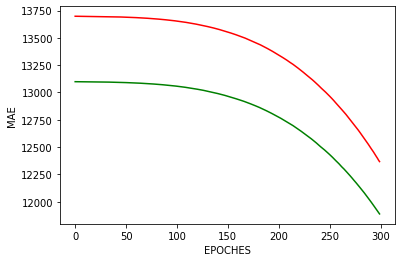

In [31]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

## Model Retuning:

In [32]:
model.add(layers.Dense(32, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [40]:
model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
history = model.fit(x_train,y_train, batch_size=16, epochs=300, validation_data=(x_val, y_val))

Epoch 1/300
7/7 [==============================] - 1s 65ms/step - loss: 272902102.0000 - mae: 13726.2710 - val_loss: 222535600.0000 - val_mae: 13096.7295
Epoch 2/300
7/7 [==============================] - 0s 11ms/step - loss: 260114616.0000 - mae: 13601.7889 - val_loss: 222470848.0000 - val_mae: 13094.1367
Epoch 3/300
7/7 [==============================] - 0s 13ms/step - loss: 275681604.0000 - mae: 13654.0979 - val_loss: 222281184.0000 - val_mae: 13086.5449
Epoch 4/300
7/7 [==============================] - 0s 12ms/step - loss: 277406906.0000 - mae: 13744.7709 - val_loss: 221941856.0000 - val_mae: 13072.9316
Epoch 5/300
7/7 [==============================] - 0s 11ms/step - loss: 238172846.0000 - mae: 12940.3635 - val_loss: 221282016.0000 - val_mae: 13046.4854
Epoch 6/300
7/7 [==============================] - 0s 12ms/step - loss: 266551306.0000 - mae: 13497.4119 - val_loss: 220405472.0000 - val_mae: 13011.2021
Epoch 7/300
7/7 [==============================] - 0s 10ms/step - loss: 2965

Epoch 55/300
7/7 [==============================] - 0s 9ms/step - loss: 67623272.0000 - mae: 6839.3187 - val_loss: 61549116.0000 - val_mae: 6765.0767
Epoch 56/300
7/7 [==============================] - 0s 8ms/step - loss: 74328707.5000 - mae: 6907.3785 - val_loss: 60252220.0000 - val_mae: 6709.3228
Epoch 57/300
7/7 [==============================] - 0s 8ms/step - loss: 63508270.5000 - mae: 6519.0413 - val_loss: 59064648.0000 - val_mae: 6657.3916
Epoch 58/300
7/7 [==============================] - 0s 8ms/step - loss: 91024002.0000 - mae: 7742.2219 - val_loss: 57944904.0000 - val_mae: 6597.8022
Epoch 59/300
7/7 [==============================] - 0s 9ms/step - loss: 68340943.0000 - mae: 6663.5982 - val_loss: 56721312.0000 - val_mae: 6571.1831
Epoch 60/300
7/7 [==============================] - 0s 8ms/step - loss: 73113189.5000 - mae: 6719.9465 - val_loss: 55675196.0000 - val_mae: 6483.2285
Epoch 61/300
7/7 [==============================] - 0s 8ms/step - loss: 63105150.5000 - mae: 6345.99

7/7 [==============================] - 0s 9ms/step - loss: 28981284.5000 - mae: 4456.6335 - val_loss: 33398022.0000 - val_mae: 5178.9004
Epoch 110/300
7/7 [==============================] - 0s 9ms/step - loss: 26226648.7500 - mae: 4305.9337 - val_loss: 32333366.0000 - val_mae: 4980.3643
Epoch 111/300
7/7 [==============================] - 0s 8ms/step - loss: 33201456.7500 - mae: 4549.5274 - val_loss: 32251746.0000 - val_mae: 4978.9268
Epoch 112/300
7/7 [==============================] - 0s 8ms/step - loss: 27318972.7500 - mae: 4127.3819 - val_loss: 32268172.0000 - val_mae: 5003.6855
Epoch 113/300
7/7 [==============================] - 0s 8ms/step - loss: 34490340.2500 - mae: 4850.1127 - val_loss: 32410716.0000 - val_mae: 5048.6465
Epoch 114/300
7/7 [==============================] - 0s 9ms/step - loss: 26875422.7500 - mae: 4113.9462 - val_loss: 32235056.0000 - val_mae: 5028.5381
Epoch 115/300
7/7 [==============================] - 0s 9ms/step - loss: 24045373.1250 - mae: 3960.0747 - va

7/7 [==============================] - 0s 9ms/step - loss: 28480129.5000 - mae: 4145.1920 - val_loss: 27519092.0000 - val_mae: 4654.7500
Epoch 164/300
7/7 [==============================] - 0s 9ms/step - loss: 22701440.7500 - mae: 3837.2319 - val_loss: 28770938.0000 - val_mae: 4802.5513
Epoch 165/300
7/7 [==============================] - 0s 21ms/step - loss: 24535763.2500 - mae: 4101.2181 - val_loss: 27220804.0000 - val_mae: 4621.1465
Epoch 166/300
7/7 [==============================] - 0s 9ms/step - loss: 24605084.2500 - mae: 3966.4821 - val_loss: 27014144.0000 - val_mae: 4592.0029
Epoch 167/300
7/7 [==============================] - 0s 8ms/step - loss: 28922215.2500 - mae: 4061.0324 - val_loss: 26420804.0000 - val_mae: 4472.5132
Epoch 168/300
7/7 [==============================] - 0s 9ms/step - loss: 26193593.5000 - mae: 4098.2589 - val_loss: 26535248.0000 - val_mae: 4518.2681
Epoch 169/300
7/7 [==============================] - 0s 9ms/step - loss: 24634763.1250 - mae: 3884.5803 - v

7/7 [==============================] - 0s 9ms/step - loss: 20974207.7500 - mae: 3516.9406 - val_loss: 21814778.0000 - val_mae: 4050.9270
Epoch 218/300
7/7 [==============================] - 0s 9ms/step - loss: 21611431.7500 - mae: 3741.6790 - val_loss: 21552932.0000 - val_mae: 4016.5723
Epoch 219/300
7/7 [==============================] - 0s 9ms/step - loss: 23162164.2500 - mae: 3804.5641 - val_loss: 21170748.0000 - val_mae: 3959.3777
Epoch 220/300
7/7 [==============================] - 0s 8ms/step - loss: 24844792.0000 - mae: 3740.9893 - val_loss: 20771616.0000 - val_mae: 3891.8027
Epoch 221/300
7/7 [==============================] - 0s 8ms/step - loss: 22320902.7500 - mae: 3419.8631 - val_loss: 20859122.0000 - val_mae: 3916.2451
Epoch 222/300
7/7 [==============================] - 0s 8ms/step - loss: 24927916.0000 - mae: 3745.6821 - val_loss: 20717946.0000 - val_mae: 3894.7075
Epoch 223/300
7/7 [==============================] - 0s 9ms/step - loss: 23939239.2500 - mae: 3734.2305 - va

7/7 [==============================] - 0s 8ms/step - loss: 15548740.1250 - mae: 3005.0424 - val_loss: 18266164.0000 - val_mae: 3483.7351
Epoch 272/300
7/7 [==============================] - 0s 8ms/step - loss: 17422708.0000 - mae: 3184.8239 - val_loss: 18374276.0000 - val_mae: 3486.9531
Epoch 273/300
7/7 [==============================] - 0s 9ms/step - loss: 16973929.6250 - mae: 3298.7079 - val_loss: 18336890.0000 - val_mae: 3481.0833
Epoch 274/300
7/7 [==============================] - 0s 9ms/step - loss: 18577786.6250 - mae: 3407.8513 - val_loss: 16734211.0000 - val_mae: 3349.5879
Epoch 275/300
7/7 [==============================] - 0s 8ms/step - loss: 14248872.1250 - mae: 2885.3646 - val_loss: 16808668.0000 - val_mae: 3346.9304
Epoch 276/300
7/7 [==============================] - 0s 8ms/step - loss: 17280598.7500 - mae: 3178.3996 - val_loss: 17654612.0000 - val_mae: 3414.1206
Epoch 277/300
7/7 [==============================] - 0s 9ms/step - loss: 18221687.7500 - mae: 3385.1543 - va

In [41]:
train_mae=history.history['mae']
val_mae=history.history['val_mae']

Text(0, 0.5, 'MAE')

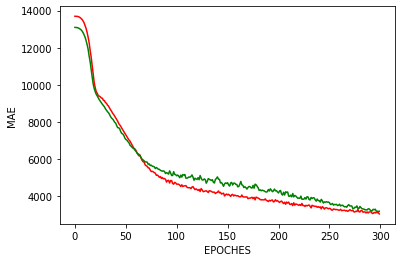

In [43]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('EPOCHES')
plt.ylabel('MAE')

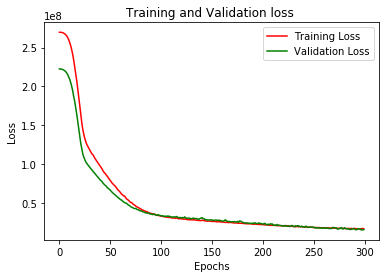

In [45]:
epochs=range(0,300)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Prediction

In [46]:
# predicting the test set results
# y_pred = model.predict(x_test)

In [47]:
a=model.predict(x_test)
print(a[0])
np.array(y_test)[0]

[8199.848]


array([7609.])

In [48]:
results = model.evaluate(x_test, y_test)
results

2/2 [==============================] - 0s 3ms/step - loss: 13622327.0000 - mae: 3019.0825


[13622327.0, 3019.08251953125]